In [145]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
#pd.set_option('html', True)
#pd.set_option('display.max_columns', 20)
#pd.set_option('display.max_rows', 25)

In [146]:
df = pd.read_csv("../data/Happiness Index/refugee_monthly.csv")
dfHP15 = pd.read_csv("../data/Happiness Index/2015.csv")
dfHP15

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [147]:
df = df.loc[df['Year'] == 2015]
df15Merged = df.merge(dfHP15, left_on = 'Country / territory of asylum/residence', right_on = 'Country', how ='inner')

In [148]:
df_grouped = df15Merged.groupby(['Country / territory of asylum/residence','Year']).agg({'Value':'sum','Happiness Score':'mean','Economy (GDP per Capita)':'mean','Family':'mean','Health (Life Expectancy)':'mean','Freedom':'mean','Trust (Government Corruption)':'mean'})
df_grouped.sort(['Value'],ascending = 0).head(5)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  


,,Family,Freedom,Happiness Score,Trust (Government Corruption),Health (Life Expectancy),Value,Economy (GDP per Capita)
Country / territory of asylum/residence,Year,,,,,,,
Germany,2015,1.29937,0.61477,6.750,0.21843,0.89186,507323,1.32792
Hungary,2015,1.20215,0.32112,4.800,0.02758,0.75905,326008,1.12094
Sweden,2015,1.28907,0.65980,7.364,0.43844,0.91087,312918,1.33171
Turkey,2015,0.94632,0.22815,5.332,0.15746,0.73172,267170,1.06098
Italy,2015,1.19777,0.26236,5.948,0.02901,0.95446,166486,1.25114


In [149]:
df_grouped = df_grouped.reset_index()
df_grouped = df_grouped.rename(columns={'Country / territory of asylum/residence': 'Country'})

In [150]:
del df_grouped['Value']
del df_grouped['Year']
del df_grouped['Happiness Score']

# Top 5 Countries People are seeking asylum to in 2015

(0, 1.4)

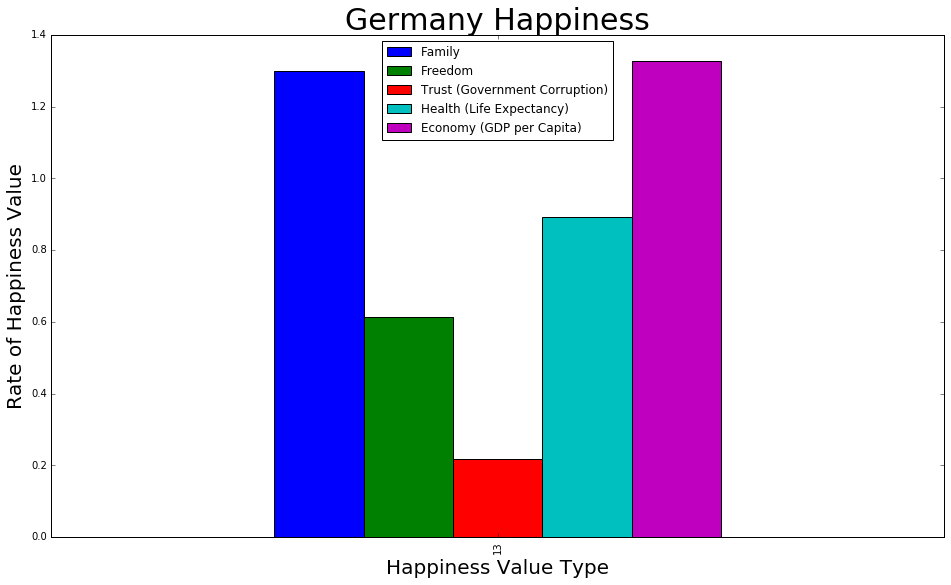

In [151]:
dfGermany = df_grouped[(df_grouped['Country']=='Germany')]
df_grouped[(df_grouped['Country']=='Germany')]
ax = dfGermany.plot(kind = 'bar',title = "Germany Happiness",figsize=(16, 9))
ax.set_xlabel("Happiness Value Type", fontsize=20)
ax.set_ylabel("Rate of Happiness Value", fontsize=20)
ax.set_title("Germany Happiness", fontsize=30)
ax.set_ylim([0,1.4])

## Happiness Score is 6.75

(0, 1.4)

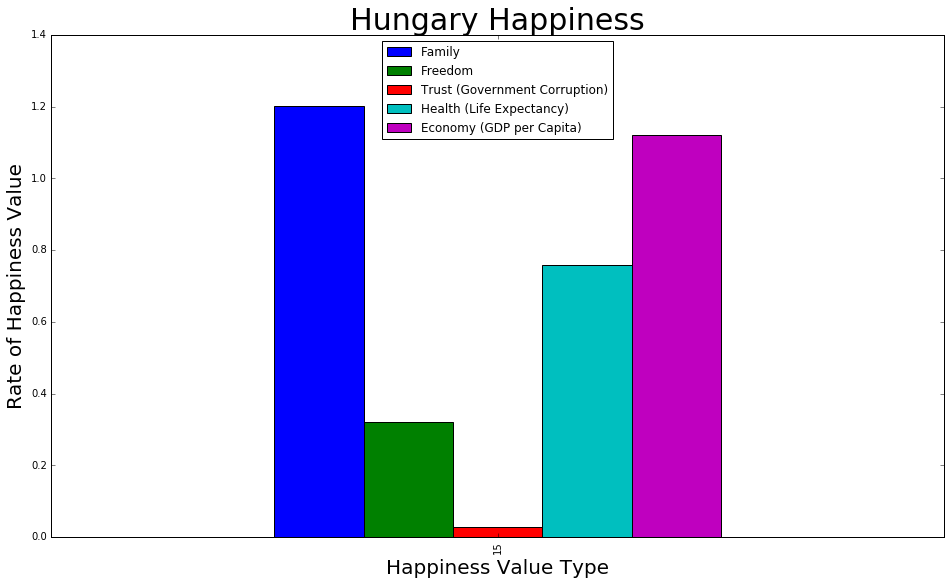

In [152]:
dfGermany = df_grouped[(df_grouped['Country']=='Hungary')]
df_grouped[(df_grouped['Country']=='Hungary')]
ax = dfGermany.plot(kind = 'bar',title = "Hungary Happiness",figsize=(16, 9))
ax.set_xlabel("Happiness Value Type", fontsize=20)
ax.set_ylabel("Rate of Happiness Value", fontsize=20)
ax.set_title("Hungary Happiness", fontsize=30)
ax.set_ylim([0,1.4])

## Happiness Score is 4.80

(0, 1.4)

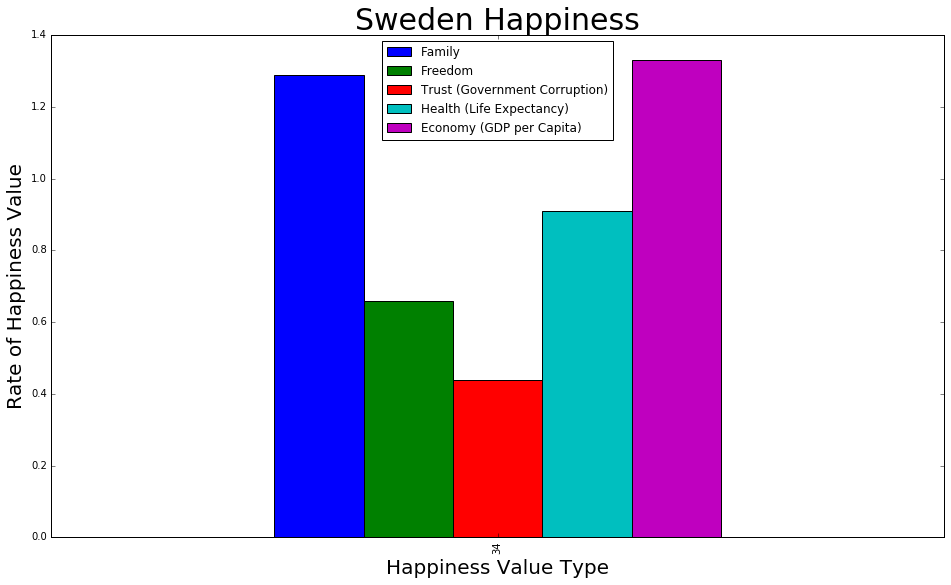

In [153]:
dfGermany = df_grouped[(df_grouped['Country']=='Sweden')]
df_grouped[(df_grouped['Country']=='Sweden')]
ax = dfGermany.plot(kind = 'bar',title = "Sweden Happiness",figsize=(16, 9))
ax.set_xlabel("Happiness Value Type", fontsize=20)
ax.set_ylabel("Rate of Happiness Value", fontsize=20)
ax.set_title("Sweden Happiness", fontsize=30)
ax.set_ylim([0,1.4])

## Happiness Score is 7.364

(0, 1.4)

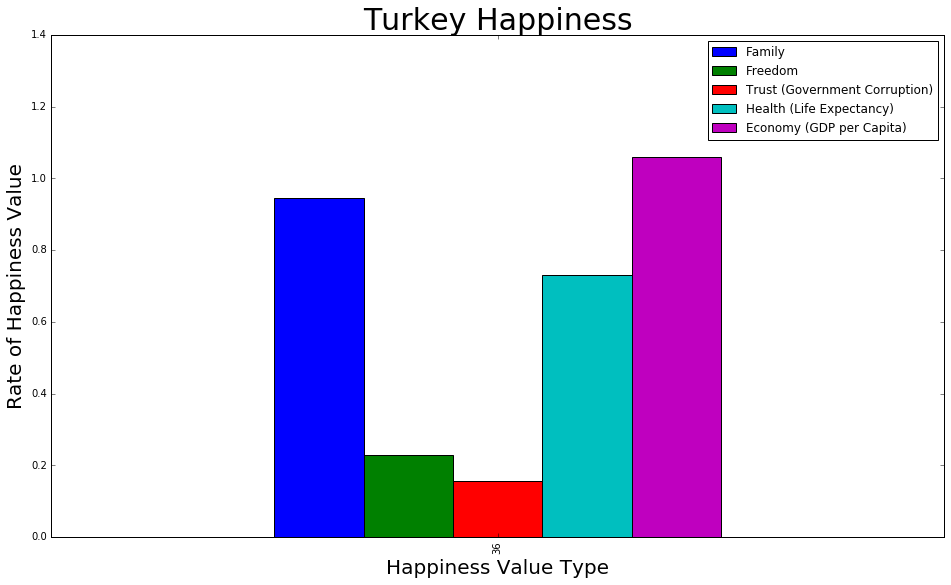

In [154]:
dfGermany = df_grouped[(df_grouped['Country']=='Turkey')]
df_grouped[(df_grouped['Country']=='Turkey')]
ax = dfGermany.plot(kind = 'bar',title = "Turkey Happiness",figsize=(16, 9))
ax.set_xlabel("Happiness Value Type", fontsize=20)
ax.set_ylabel("Rate of Happiness Value", fontsize=20)
ax.set_title("Turkey Happiness", fontsize=30)
ax.set_ylim([0,1.4])

## Happiness Score is 5.332

(0, 1.4)

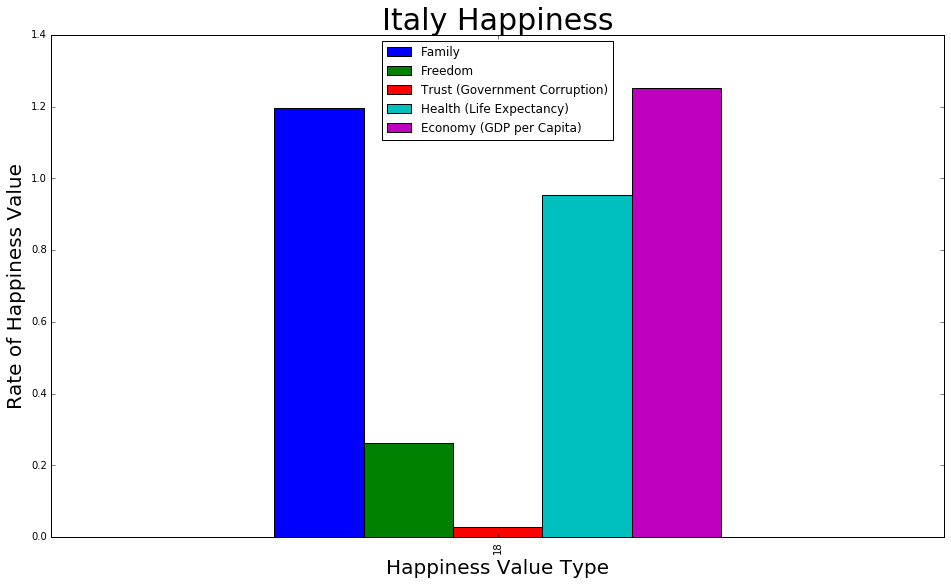

In [155]:
dfGermany = df_grouped[(df_grouped['Country']=='Italy')]
df_grouped[(df_grouped['Country']=='Italy')]
ax = dfGermany.plot(kind = 'bar',title = "Italy Happiness",figsize=(16, 9))
ax.set_xlabel("Happiness Value Type", fontsize=20)
ax.set_ylabel("Rate of Happiness Value", fontsize=20)
ax.set_title("Italy Happiness", fontsize=30)
ax.set_ylim([0,1.4])

## Happiness Score is 5.948

In [156]:
df15MergedFrom = df.merge(dfHP15, left_on = 'Origin', right_on = 'Country', how ='inner')

In [131]:
df_groupedOrigin = df15Merged.groupby(['Origin','Year']).agg({'Value':'sum','Happiness Score':'mean','Economy (GDP per Capita)':'mean','Family':'mean','Health (Life Expectancy)':'mean','Freedom':'mean','Trust (Government Corruption)':'mean'})
df_groupedOrigin.sort(['Value'],ascending = 0).head(5)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  


,,Family,Freedom,Happiness Score,Trust (Government Corruption),Health (Life Expectancy),Value,Economy (GDP per Capita)
Origin,Year,,,,,,,
Syrian Arab Rep.,2015,1.198759,0.480885,6.311541,0.182278,0.866746,538297,1.234347
Afghanistan,2015,1.221237,0.495065,6.402107,0.201458,0.869286,409089,1.248332
Iraq,2015,1.210677,0.482690,6.328035,0.190892,0.866967,278889,1.243165
Serbia and Kosovo: S/RES/1244 (1999),2015,1.251192,0.547767,6.729401,0.238246,0.888366,175314,1.289031
Pakistan,2015,1.215169,0.495514,6.340777,0.194875,0.878375,76654,1.245656


In [160]:
df_groupedOrigin = df_groupedOrigin.reset_index()
df_groupedOrigin = df_groupedOrigin.rename(columns={'Origin': 'Country'})

In [163]:
del df_groupedOrigin['Value']
del df_groupedOrigin['Year']
del df_groupedOrigin['Happiness Score']
del df_groupedOrigin['index']
del df_groupedOrigin['level_0']

# Top 5 Countries Originated From in 2015

(0, 1.4)

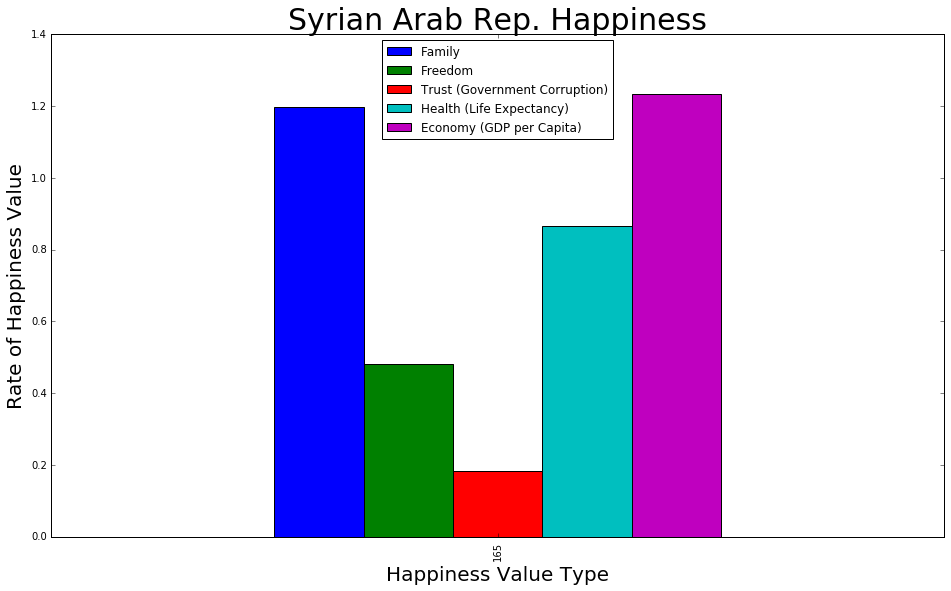

In [164]:
dfSyrianArabRep = df_groupedOrigin[(df_groupedOrigin['Country']=='Syrian Arab Rep.')]
df_groupedOrigin[(df_groupedOrigin['Country']=='Syrian Arab Rep.')]
ax = dfSyrianArabRep.plot(kind = 'bar',title = "Syrian Arab Rep. Happiness",figsize=(16, 9))
ax.set_xlabel("Happiness Value Type", fontsize=20)
ax.set_ylabel("Rate of Happiness Value", fontsize=20)
ax.set_title("Syrian Arab Rep. Happiness", fontsize=30)
ax.set_ylim([0,1.4])

## Happiness Score is 3.006

(0, 1.4)

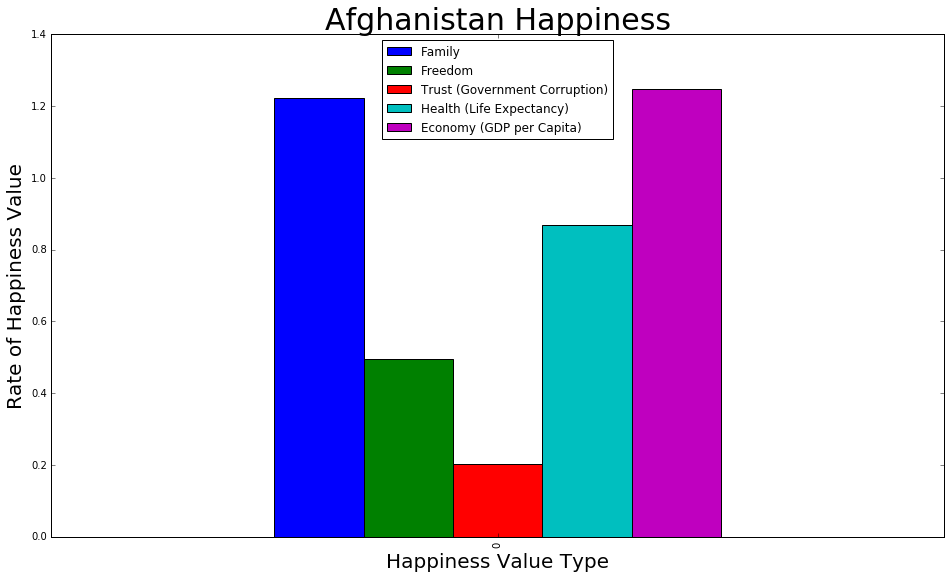

In [165]:
dfAfghanisthan = df_groupedOrigin[(df_groupedOrigin['Country']=='Afghanistan')]
df_groupedOrigin[(df_groupedOrigin['Country']=='Afghanistan')]
ax = dfAfghanisthan.plot(kind = 'bar',title = "Afghanistan Happiness",figsize=(16, 9))
ax.set_xlabel("Happiness Value Type", fontsize=20)
ax.set_ylabel("Rate of Happiness Value", fontsize=20)
ax.set_title("Afghanistan Happiness", fontsize=30)
ax.set_ylim([0,1.4])

## Happiness Score is 3.575

(0, 1.4)

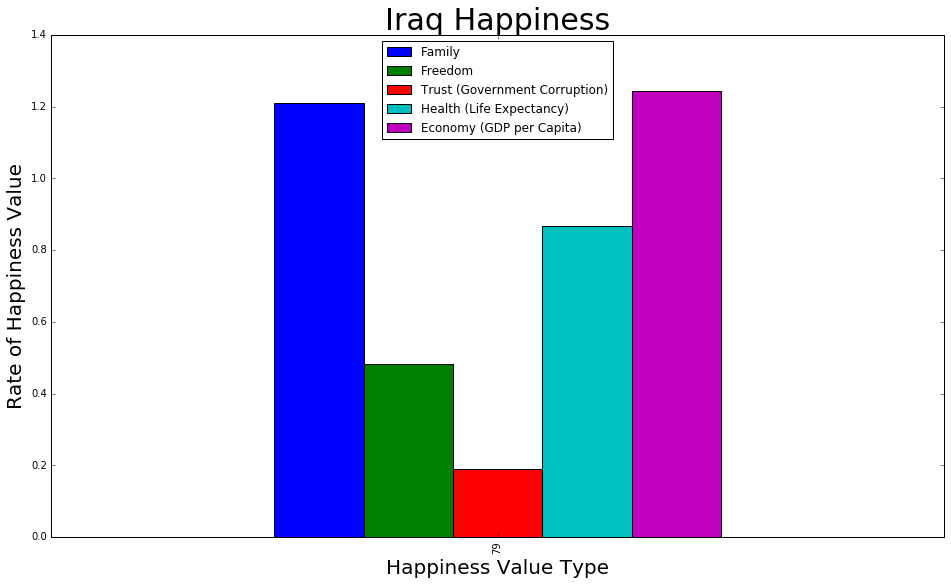

In [166]:
dfSyrianArabRep = df_groupedOrigin[(df_groupedOrigin['Country']=='Iraq')]
df_groupedOrigin[(df_groupedOrigin['Country']=='Iraq')]
ax = dfSyrianArabRep.plot(kind = 'bar',title = "Iraq Happiness",figsize=(16, 9))
ax.set_xlabel("Happiness Value Type", fontsize=20)
ax.set_ylabel("Rate of Happiness Value", fontsize=20)
ax.set_title("Iraq Happiness", fontsize=30)
ax.set_ylim([0,1.4])

(0, 1.4)

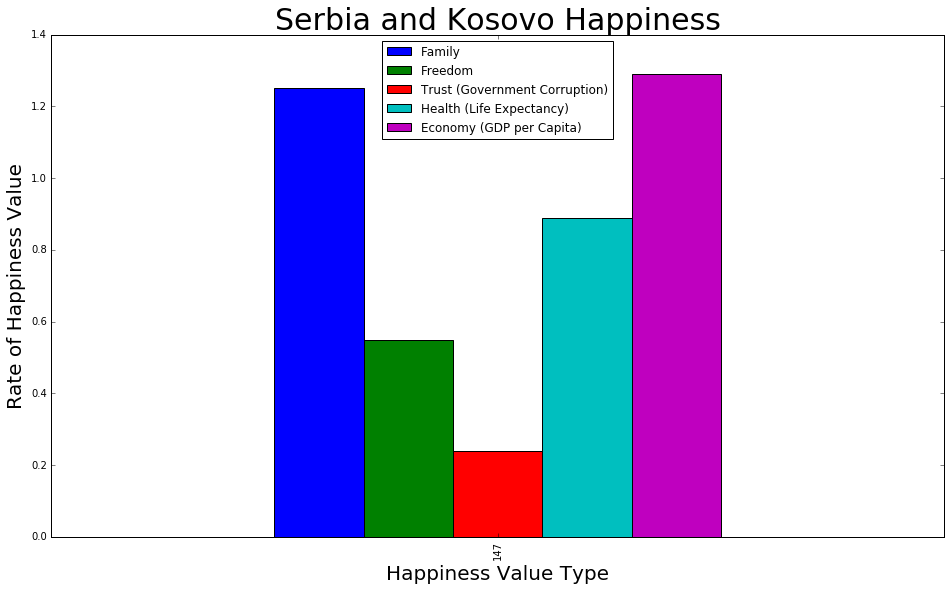

In [167]:
dfSerbiaAndKosovo = df_groupedOrigin[(df_groupedOrigin['Country']=='Serbia and Kosovo: S/RES/1244 (1999)')]
df_groupedOrigin[(df_groupedOrigin['Country']=='Serbia and Kosovo: S/RES/1244 (1999)')]
ax = dfSerbiaAndKosovo.plot(kind = 'bar',title = "Serbia and Kosovo Happiness",figsize=(16, 9))
ax.set_xlabel("Happiness Value Type", fontsize=20)
ax.set_ylabel("Rate of Happiness Value", fontsize=20)
ax.set_title("Serbia and Kosovo Happiness", fontsize=30)
ax.set_ylim([0,1.4])

## Happiness Score is 5.123

(0, 1.4)

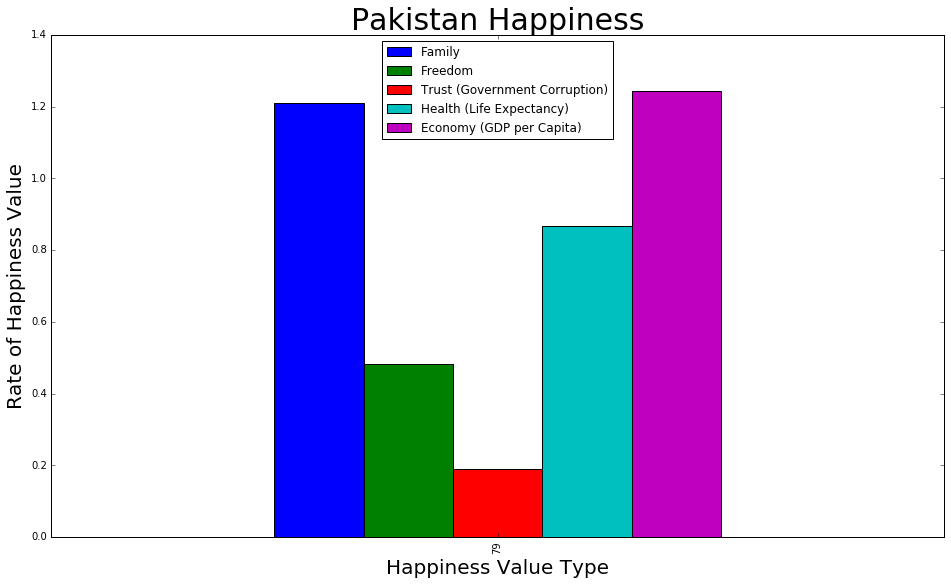

In [168]:
dfPakistan = df_groupedOrigin[(df_groupedOrigin['Country']=='Pakistan')]
df_groupedOrigin[(df_groupedOrigin['Country']=='Pakistan')]
ax = dfSyrianArabRep.plot(kind = 'bar',title = "Pakistan Happiness",figsize=(16, 9))
ax.set_xlabel("Happiness Value Type", fontsize=20)
ax.set_ylabel("Rate of Happiness Value", fontsize=20)
ax.set_title("Pakistan Happiness", fontsize=30)
ax.set_ylim([0,1.4])

## Happiness Score is 5.194